# Data Understanding

### Settings/Functions
Read in settings and functions.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import scipy as sp
import sys
import warnings
from scipy.stats import zscore
warnings.filterwarnings("ignore", category=RuntimeWarning)

### Data
Read in the data and take an initial look.

In [77]:
# Import original dataset
data_loc = 'C://Users/User/Documents/GitHub/Python/Ohio Reading/data/'
data = pd.read_csv(data_loc+'reading_data.csv',na_values=['.'])

In [78]:
data.head()

,year,school,subject,number_tested,pct_prof_or_above,pct_adv,pct_acc,pct_prof,pct_bsc,pct_ltd,...,perc_nobach,perc_bachplus,perc_employ,perc_unemploy,median_inc,perc_assist,perc_noassist,gini,perc_poverty,perc_nopoverty
0,2007,Adams County/Ohio Valley Local School District...,Reading,304,69.7,26.0,29.6,14.1,13.5,16.8,...,0.92427,0.07573,0.935027,0.064973,36566,0.034432,0.965568,0.442,0.258998,0.741002
1,2007,"Akron City School District, Ohio",Reading,1899,68.3,22.7,26.0,19.5,12.7,19.0,...,0.81690,0.18310,0.895400,0.104600,35169,0.051400,0.948600,0.447,0.294408,0.705592
2,2007,"Alliance City School District, Ohio",Reading,192,70.3,17.2,28.6,24.5,12.5,17.2,...,0.88299,0.11701,0.926347,0.073653,36713,0.051716,0.948284,0.392,0.190865,0.809135
3,2007,"Amherst Exempted Village School District, Ohio",Reading,309,90.6,46.6,31.4,12.6,6.1,3.2,...,0.79602,0.20398,0.928066,0.071934,63987,0.004548,0.995452,0.367,0.083676,0.916324
4,2007,"Anthony Wayne Local School District, Ohio",Reading,314,91.1,43.0,32.8,15.3,5.7,3.2,...,0.63312,0.36688,0.953758,0.046242,83045,0.010929,0.989071,0.384,0.019753,0.980247


## Describing the Data

### Data Shape

 - The dataset is currently in a long format where each school district has a row for each of the four years of interest. The datasets do not contain a before/after variable, which will need to be added to the dataset in order to perform the necessary analysis. The initial dataset has 584 rows and 30 columns.

In [79]:
# Checking the dimensions of the dataset
print("data shape: {}".format(data.shape))

data shape: (584, 30)


### Data Type

 - The dataset contains the following data types:
    - Factors/Strings: (2)
    - Integers (4)
    - Numeric (24)

In [80]:
print("data types: {}".format(data.dtypes.value_counts()))

data types: float64    24
int64       4
object      2
dtype: int64


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               584 non-null    int64  
 1   school             584 non-null    object 
 2   subject            584 non-null    object 
 3   number_tested      584 non-null    int64  
 4   pct_prof_or_above  584 non-null    float64
 5   pct_adv            584 non-null    float64
 6   pct_acc            584 non-null    float64
 7   pct_prof           584 non-null    float64
 8   pct_bsc            584 non-null    float64
 9   pct_ltd            584 non-null    float64
 10  tot_pop            584 non-null    int64  
 11  perc_male          584 non-null    float64
 12  perc_female        584 non-null    float64
 13  perc_under5        584 non-null    float64
 14  perc_5to19         584 non-null    float64
 15  perc_20plus        584 non-null    float64
 16  perc_white         455 non

In [82]:
# Converting 'year' to a factor
#['year'] = data['year'].astype(object)
print(data.dtypes) 

year                   int64
school                object
subject               object
number_tested          int64
pct_prof_or_above    float64
pct_adv              float64
pct_acc              float64
pct_prof             float64
pct_bsc              float64
pct_ltd              float64
tot_pop                int64
perc_male            float64
perc_female          float64
perc_under5          float64
perc_5to19           float64
perc_20plus          float64
perc_white           float64
perc_black           float64
perc_asian           float64
perc_other           float64
perc_nobach          float64
perc_bachplus        float64
perc_employ          float64
perc_unemploy        float64
median_inc             int64
perc_assist          float64
perc_noassist        float64
gini                 float64
perc_poverty         float64
perc_nopoverty       float64
dtype: object


 - Variable Types:
    - "year", "school", "subject", and the future variable "time_type" should be the only categorical variables in the data set.
    - The remaining variables should be continuous.
 - This was not the case, however, so the year variable was adjusted accordingly.

## Additional Variables

In [83]:
# Separating the datasets into before and after the program  
before = data[(data.year == 2007) | (data.year == 2008)]
after = data[(data.year == 2012) | (data.year == 2013)]
del data

# Converting the datasets into Pandas dataframes
before = pd.DataFrame(before) 
after = pd.DataFrame(after)

# Adding a time variable to distinguish between years before/after the program  
before = before.assign(time_type = '0')
after = after.assign(time_type = '1')

print(before.shape)
print(after.shape)

(292, 31)
(292, 31)


In [84]:
# Joining the datasets back together
data = before.append([after])
print(data.shape)

del before
del after

(584, 31)


In [85]:
# Checking the counts
pd.crosstab(data['year'], data['time_type'])

time_type,0,1
year,,
2007,146,0
2008,146,0
2012,0,146
2013,0,146


In [86]:
# Output to updated dataset to csv
data.to_csv((data_loc+'/reading_ind.csv'), index = False)

In [87]:
# Read in updated file
data = pd.read_csv(data_loc+'reading_ind.csv')

## Exploring the Data

In [88]:
# Function to count the number of nulls in each column
def null_counts(df):
    null_df = pd.DataFrame(df.isnull().sum(),columns=['null_count'])
    null_df['null_fraction'] = null_df['null_count'] / df.shape[0]
    null_df = null_df.sort_values('null_count',ascending=False)
    return null_df

In [89]:
# Checking for null values
null_counts(data)

,null_count,null_fraction
perc_white,129,0.220890
perc_other,129,0.220890
perc_asian,129,0.220890
perc_black,129,0.220890
perc_unemploy,6,0.010274
perc_employ,6,0.010274
perc_bachplus,2,0.003425
perc_nobach,2,0.003425
year,0,0.000000
perc_nopoverty,0,0.000000


### Exploratory Analysis

#### Statistical Description

In [90]:
# Checking the descriptive statistics of the data
descriptive_data = data.describe()

# Saving output to CSV for easier analysis
descriptive_data.to_csv(data_loc+'/describe_output.csv')
descriptive_data

,year,number_tested,pct_prof_or_above,pct_adv,pct_acc,pct_prof,pct_bsc,pct_ltd,tot_pop,perc_male,...,perc_bachplus,perc_employ,perc_unemploy,median_inc,perc_assist,perc_noassist,gini,perc_poverty,perc_nopoverty,time_type
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,582.000000,578.000000,578.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,2010.000000,473.910959,79.422603,32.258219,29.251199,17.916952,11.237842,9.353082,49084.830479,0.483956,...,0.285216,0.917941,0.082059,52783.979452,0.026818,0.973182,0.424006,0.188359,0.811641,0.500000
std,2.551695,506.149893,11.323588,13.381309,5.806426,4.505671,4.870641,7.151134,59501.773427,0.020397,...,0.149669,0.040477,0.040477,18294.944692,0.019942,0.019942,0.040513,0.138126,0.138126,0.500429
min,2007.000000,23.000000,44.000000,4.000000,15.100000,5.700000,1.700000,0.500000,19642.000000,0.423590,...,0.067270,0.668970,0.019481,19023.000000,0.000805,0.826704,0.335600,0.003247,0.370321,0.000000
25%,2007.750000,257.750000,72.875000,22.100000,25.100000,15.075000,7.500000,3.900000,25099.750000,0.473768,...,0.156670,0.897831,0.054083,38384.750000,0.012909,0.964567,0.395000,0.076276,0.716361,0.000000
50%,2010.000000,320.500000,81.250000,30.850000,28.600000,17.900000,10.700000,7.350000,33422.500000,0.482614,...,0.254795,0.929392,0.070608,49842.500000,0.021450,0.978550,0.422000,0.147185,0.852815,0.500000
75%,2012.250000,488.500000,88.200000,42.450000,32.500000,20.525000,14.525000,12.725000,48578.500000,0.492897,...,0.394615,0.945917,0.102169,65033.250000,0.035433,0.987091,0.451000,0.283639,0.923724,1.000000
max,2013.000000,4296.000000,97.200000,67.200000,46.900000,44.000000,32.000000,35.300000,503605.000000,0.591301,...,0.737220,0.980519,0.331030,114719.000000,0.173296,0.999195,0.554700,0.629679,0.996753,1.000000


#### Correlation

 - The only variables that seem to be highly correlated are the variables that I expected. These are the variables that are meant to add to one. For example, 'perc_male' and 'perc_female' add to one for each district. This was expected and will be handled in the modeling notebook by excluding on the variables from the models. Once these variables are dropped during modeling, I don't expect multicollinearity to be an issue with this dataset. I will check the VIF when I get to the models though to verify.

In [91]:
# Correlation Function
def plot_correlation_matrix_heat_map(df,label,qty_fields=10):
    df = pd.concat([df[label],df.drop(label,axis=1)],axis=1)
    correlation_matrix = df.corr()
    index = correlation_matrix.sort_values(label, ascending=False).index
    correlation_matrix = correlation_matrix[index].sort_values(label,ascending=False)

    fig,ax = plt.subplots()
    fig.set_size_inches((10,10))
    sb.heatmap(correlation_matrix.iloc[:qty_fields,:qty_fields],annot=True,fmt='.2f',ax=ax)
    return(fig,ax)

(<Figure size 720x720 with 2 Axes>, <AxesSubplot:>)

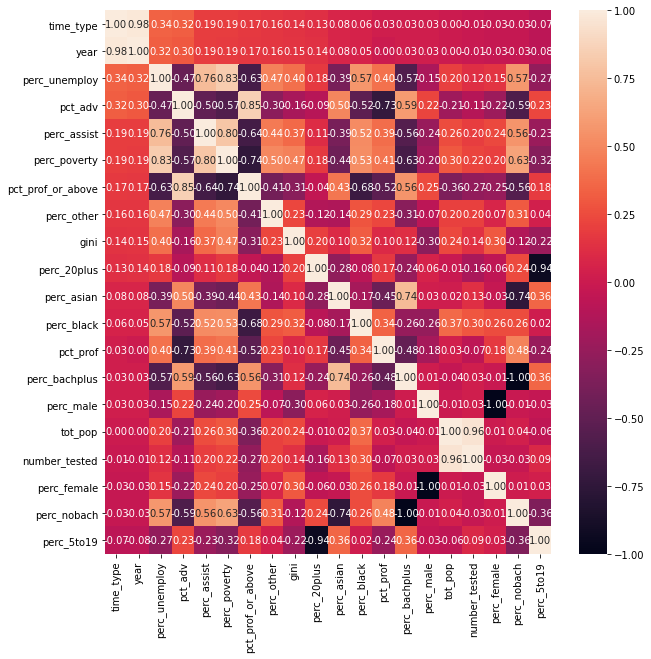

In [92]:
# Correlation Plot
plot_correlation_matrix_heat_map(data, 'time_type', 20)

#### Variance

 - All variables have a variance greater than zero.

In [93]:
data.var()

year                 6.511149e+00
number_tested        2.561877e+05
pct_prof_or_above    1.282236e+02
pct_adv              1.790594e+02
pct_acc              3.371458e+01
pct_prof             2.030107e+01
pct_bsc              2.372315e+01
pct_ltd              5.113872e+01
tot_pop              3.540461e+09
perc_male            4.160534e-04
perc_female          4.160534e-04
perc_under5          1.666529e-04
perc_5to19           8.425594e-04
perc_20plus          1.239108e-03
perc_white           2.357527e-02
perc_black           2.244066e-02
perc_asian           5.421647e-04
perc_other           3.380323e-04
perc_nobach          2.240080e-02
perc_bachplus        2.240080e-02
perc_employ          1.638393e-03
perc_unemploy        1.638393e-03
median_inc           3.347050e+08
perc_assist          3.977015e-04
perc_noassist        3.977015e-04
gini                 1.641280e-03
perc_poverty         1.907876e-02
perc_nopoverty       1.907876e-02
time_type            2.504288e-01
dtype: float64

#### Outliers
##### Boxplot

 - The majority of the variables do not seem to have too many extreme outliers. While there are a few, it does not seem to be impacting every variable.

An exception occurred for column: school
An exception occurred for column: subject


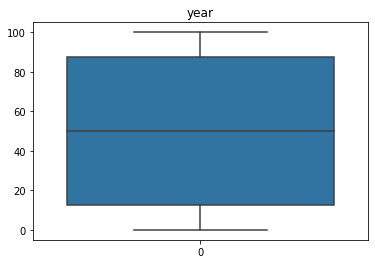

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

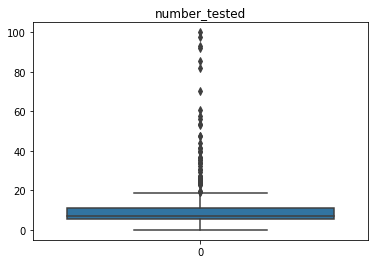

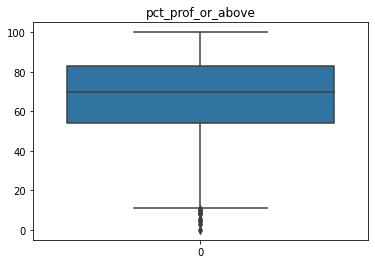

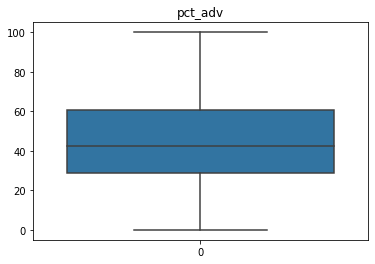

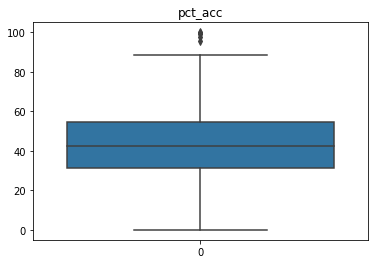

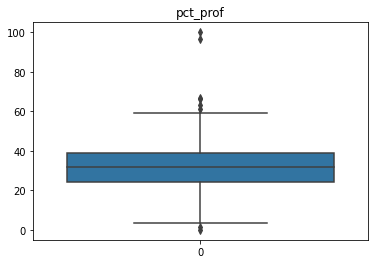

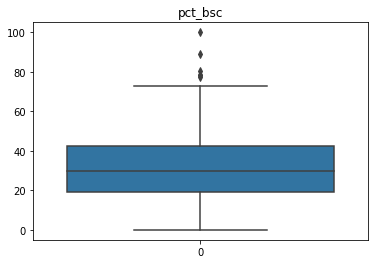

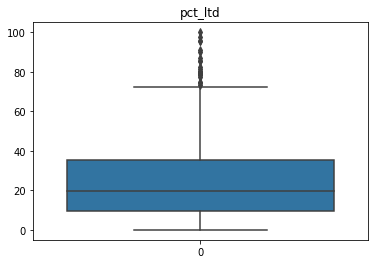

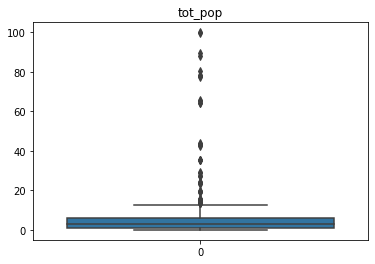

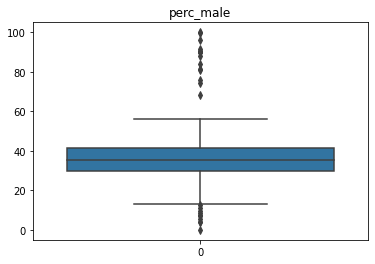

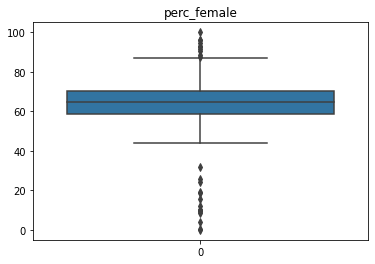

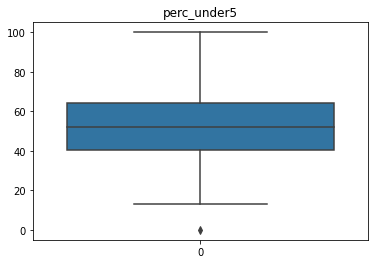

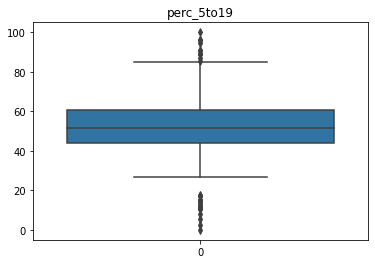

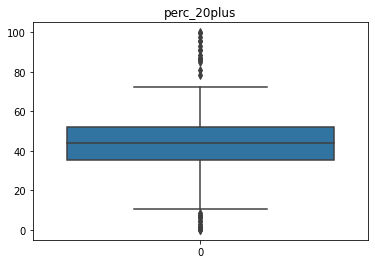

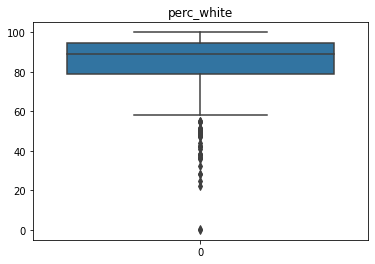

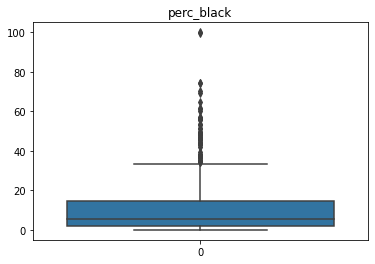

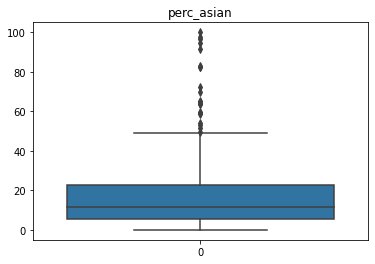

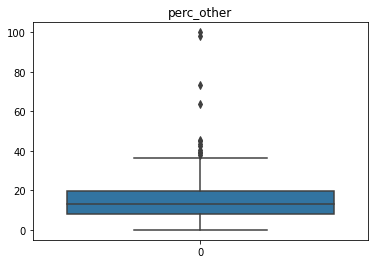

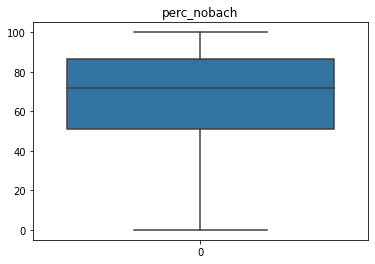

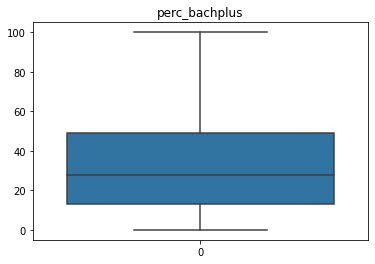

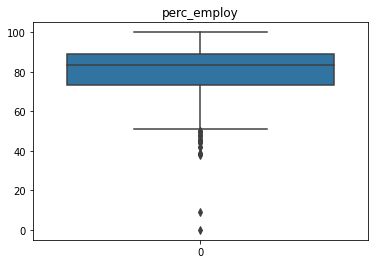

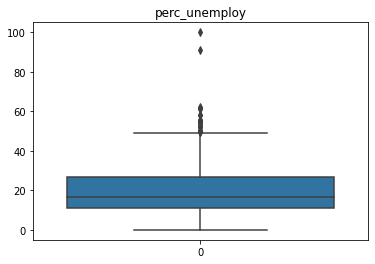

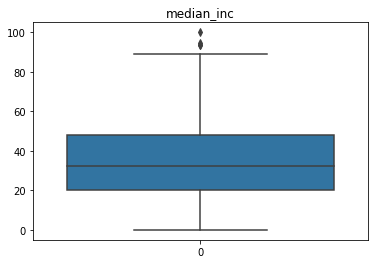

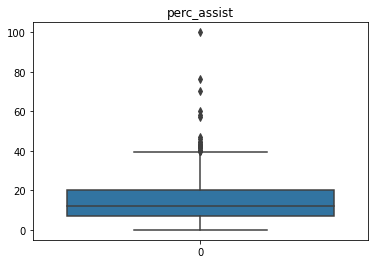

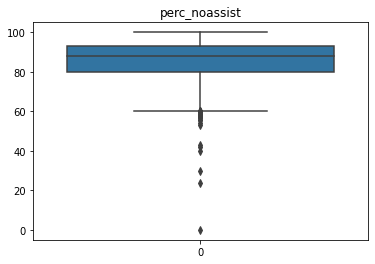

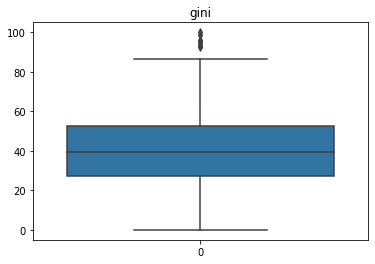

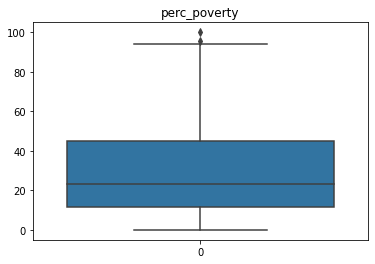

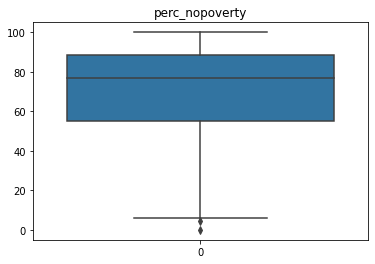

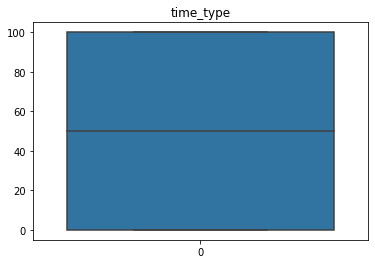

In [94]:
i = 1
for col in data.columns:
    plt.figure(i)
    try:
        sb.boxplot(data=((data[col]-data[col].min())/(data[col].max()-data[col].min()))*100).set_title(col)
    except:
        print("An exception occurred for column: {}".format(col))
    i+=1

##### Z_scores

 - Since z-scores are not necessarily reliable if the data set does not follow a normal distribution, I like to also look at distributions of the data. Some variables are not meant to follow a normal distribution. When looking at z-scores though, I use (-/+) 3 standard deviations as the cut off for an outlier.
 - In this dataset, the majority of the columns do not have a large number of z-score outliers, as evidenced later in this section. The variables 'tot_pop' and 'perc_male' have the most outliers at 15 each.

In [95]:
numeric_cols = data.select_dtypes(exclude=[object])

In [96]:
print(numeric_cols.shape)

(584, 29)


In [97]:
numeric_cols.head(3)

,year,number_tested,pct_prof_or_above,pct_adv,pct_acc,pct_prof,pct_bsc,pct_ltd,tot_pop,perc_male,...,perc_bachplus,perc_employ,perc_unemploy,median_inc,perc_assist,perc_noassist,gini,perc_poverty,perc_nopoverty,time_type
0,2007,304,69.7,26.0,29.6,14.1,13.5,16.8,23624,0.505969,...,0.07573,0.935027,0.064973,36566,0.034432,0.965568,0.442,0.258998,0.741002,0
1,2007,1899,68.3,22.7,26.0,19.5,12.7,19.0,191181,0.483683,...,0.18310,0.895400,0.104600,35169,0.051400,0.948600,0.447,0.294408,0.705592,0
2,2007,192,70.3,17.2,28.6,24.5,12.5,17.2,21281,0.474696,...,0.11701,0.926347,0.073653,36713,0.051716,0.948284,0.392,0.190865,0.809135,0


In [98]:
# Note that `select_dtypes` returns a data frame. We are selecting only the columns
zscores = numeric_cols.apply(zscore)

In [99]:
print(zscores)

         year  number_tested  pct_prof_or_above   pct_adv   pct_acc  pct_prof  \
0   -1.176697      -0.335981          -0.859351 -0.468085  0.060123 -0.847870   
1   -1.176697       2.817961          -0.983093 -0.714909 -0.560411  0.351647   
2   -1.176697      -0.557449          -0.806319 -1.126282 -0.112248  1.462311   
3   -1.176697      -0.326094           0.987936  1.072696  0.370390 -1.181070   
4   -1.176697      -0.316207           1.032129  0.803433  0.611709 -0.581311   
..        ...            ...                ...       ...       ...       ...   
579  1.176697      -0.403212           0.643227  1.469110 -1.784243 -0.448031   
580  1.176697       0.464863           1.005613  1.596262 -0.681071 -1.314349   
581  1.176697      -0.284569          -0.346707 -0.168904  0.025649 -0.403605   
582  1.176697      -0.112535          -2.079091 -1.298311 -0.956864 -0.137045   
583  1.176697      -0.438805          -0.496965 -0.094109 -1.008575  0.329434   

      pct_bsc   pct_ltd   t

In [100]:
zscores.describe()

,year,number_tested,pct_prof_or_above,pct_adv,pct_acc,pct_prof,pct_bsc,pct_ltd,tot_pop,perc_male,...,perc_bachplus,perc_employ,perc_unemploy,median_inc,perc_assist,perc_noassist,gini,perc_poverty,perc_nopoverty,time_type
count,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,...,0.0,0.0,0.0,5.840000e+02,584.000000,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,584.000000
mean,9.733462e-17,4.258390e-17,-3.163375e-16,-7.300097e-17,-7.300097e-17,-1.216683e-16,1.460019e-16,9.733462e-17,5.779243e-17,8.638448e-16,...,NaN,NaN,NaN,-2.433366e-17,0.000000,-6.886424e-15,-3.650048e-17,1.216683e-16,4.988399e-16,0.000000
std,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,...,NaN,NaN,NaN,1.000857e+00,1.000857,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857
min,-1.176697e+00,-8.916282e-01,-3.130895e+00,-2.113578e+00,-2.439251e+00,-2.713786e+00,-1.959910e+00,-1.239058e+00,-4.952469e-01,-2.962048e+00,...,NaN,NaN,NaN,-1.846954e+00,-1.305518,-7.351340e+00,-2.184054e+00,-1.341316e+00,-3.197794e+00,-1.000000
25%,-8.825226e-01,-4.274352e-01,-5.787226e-01,-7.597857e-01,-7.155447e-01,-6.312908e-01,-7.680810e-01,-7.632016e-01,-4.034441e-01,-4.999138e-01,...,NaN,NaN,NaN,-7.877353e-01,-0.698087,-4.323707e-01,-7.165906e-01,-8.121474e-01,-6.903971e-01,-1.000000
50%,0.000000e+00,-3.033538e-01,1.615181e-01,-1.053280e-01,-1.122475e-01,-3.765608e-03,-1.105201e-01,-2.803470e-01,-2.634503e-01,-6.588959e-02,...,NaN,NaN,NaN,-1.609188e-01,-0.269432,2.694318e-01,-4.956183e-02,-2.983467e-01,2.983467e-01,0.000000
75%,8.825226e-01,2.884827e-02,7.758073e-01,7.622960e-01,5.599980e-01,5.793330e-01,6.754707e-01,4.719263e-01,-8.516797e-03,4.387211e-01,...,NaN,NaN,NaN,6.701180e-01,0.432371,6.980872e-01,6.668765e-01,6.903971e-01,8.121474e-01,1.000000
max,1.176697e+00,7.557772e+00,1.571290e+00,2.613476e+00,3.042135e+00,5.793901e+00,4.266370e+00,3.631474e+00,7.645315e+00,5.267178e+00,...,NaN,NaN,NaN,3.388265e+00,7.351340,1.305518e+00,3.228761e+00,3.197794e+00,1.341316e+00,1.000000


In [101]:
# Use apply to count the number of observations in each row that are above or below 3
zscores[(np.abs(zscores > 3))].count()

year                  0
number_tested        14
pct_prof_or_above     0
pct_adv               0
pct_acc               3
pct_prof              2
pct_bsc               3
pct_ltd               6
tot_pop              15
perc_male            15
perc_female           0
perc_under5           0
perc_5to19            4
perc_20plus           8
perc_white            0
perc_black            0
perc_asian            0
perc_other            0
perc_nobach           0
perc_bachplus         0
perc_employ           0
perc_unemploy         0
median_inc            4
perc_assist           6
perc_noassist         0
gini                  3
perc_poverty          1
perc_nopoverty        0
time_type             0
dtype: int64

#### Distributions
 - While some of the variables follow a normal or near-normal distribution, many of the variables are skewed to either the left of the right.       

An exception occurred for column: school
An exception occurred for column: subject


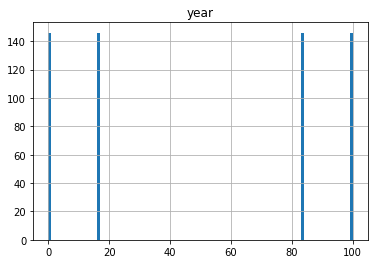

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

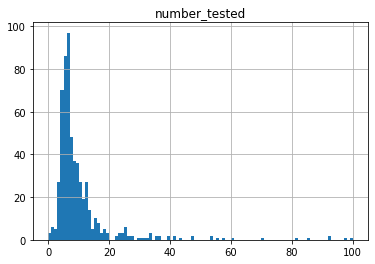

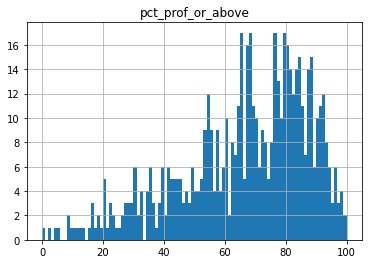

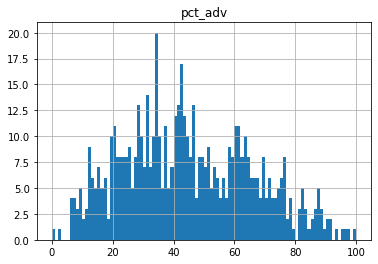

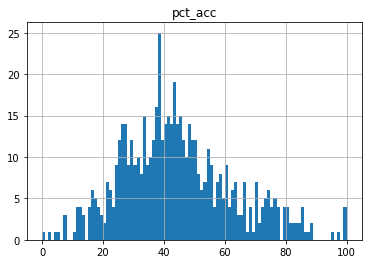

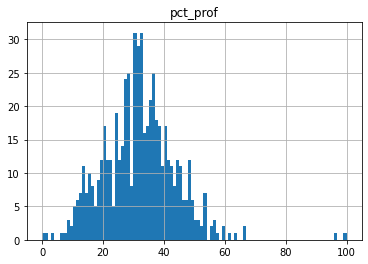

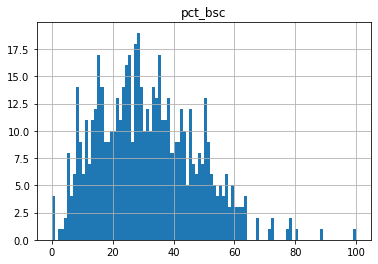

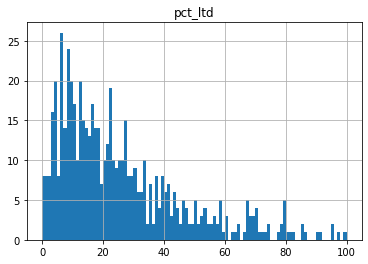

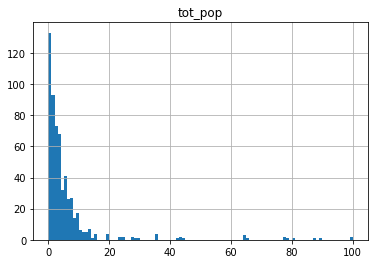

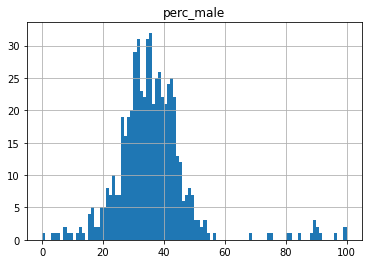

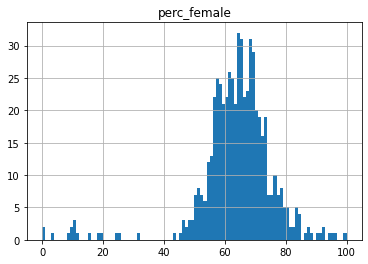

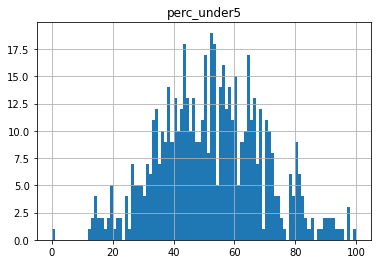

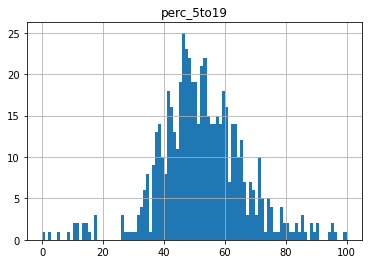

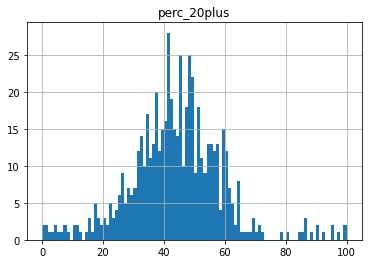

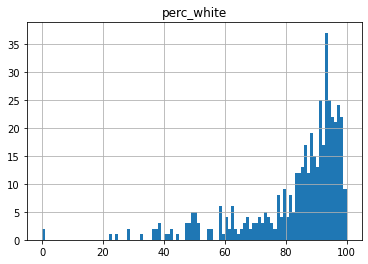

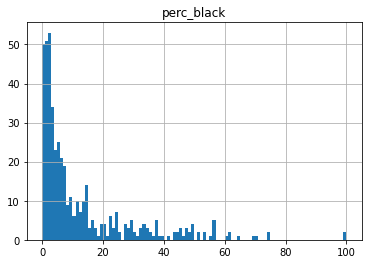

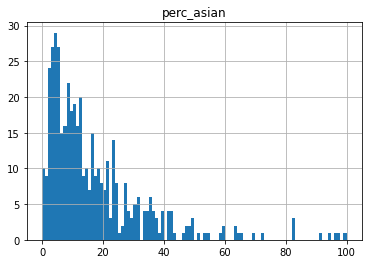

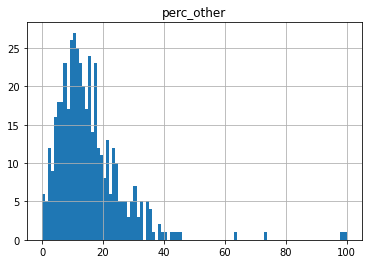

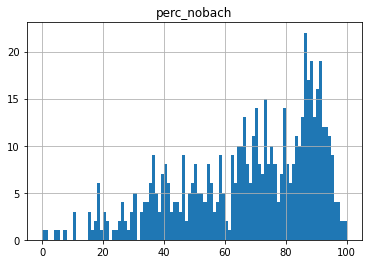

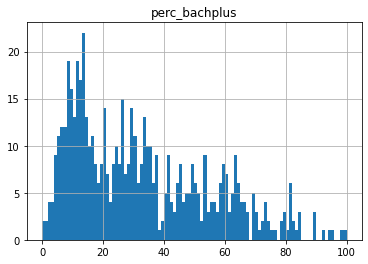

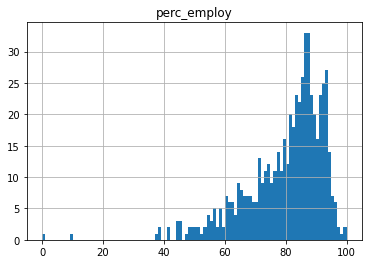

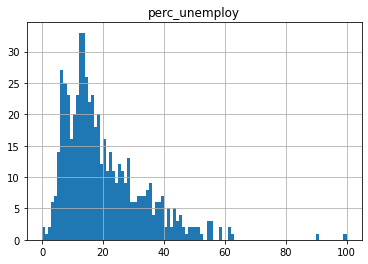

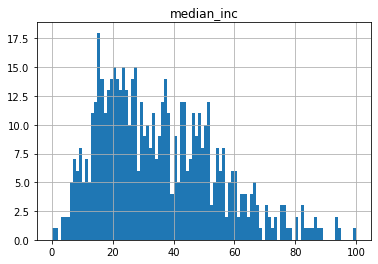

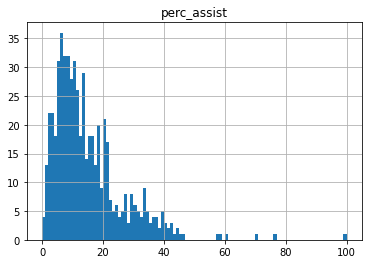

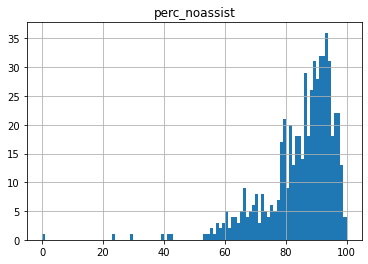

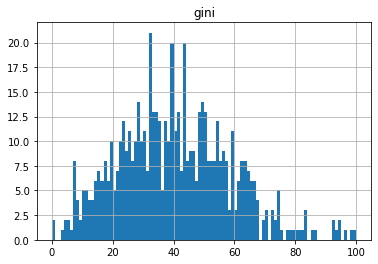

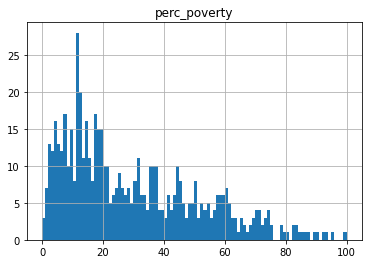

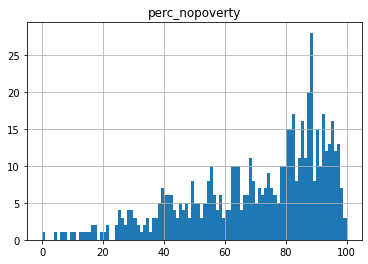

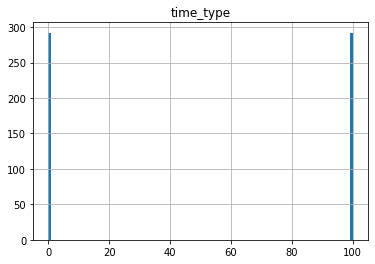

In [102]:
# Creating a histogram for each variables
i = 1
for col in data.columns:
    plt.figure(i)
    try:
        data2=((data[col]-data[col].min())/(data[col].max()-data[col].min()))*100
        data2.hist(bins=100)
        plt.title(col)
    except:
        print("An exception occurred for column: {}".format(col))
    
    i+=1
plt.show()

## Verifying the Data Quality

### Data Source and Reliability

- Data Origin: Reading scores were pulled directly from the Ohio Department of Education's website while demographic information was pulled directly from the U.S. Census Bureau's website. Due to the sources from which the data was pulled, I believe it to be highly reliable. 
- Reliability: Due to the sources from which the data was pulled, I believe it to be highly reliable. 

### Missing Data

 - There are some variables some missing data that I will look into in the next notebook. The four columns covering race/ethnicity for each school district will likely have to dropped since almost a quarter of the observations are empty (129 rows out of 584).

## Outcome 

In [103]:
# Exporting the data set to CSV a final time
data.to_csv((data_loc+'/reading_prepped.csv'), index = False)